In [23]:
import pandas as pd
import numpy as np
from pandas.tseries.offsets import DateOffset
import random
import time

import matplotlib.pyplot as plt
%matplotlib inline

In [24]:
import datetime
dateparse = lambda x: datetime.datetime.strptime(x, '%Y-%m-%d %H:%M:%S.%f %z')

data_file = ('../data/raw/weatherHistory.csv')
data = pd.read_csv(data_file)

data['Formatted Date'] = pd.to_datetime(
    data['Formatted Date'].map(lambda x: ' '.join(x.split()[:2])), 
    format = '%Y-%m-%d %H:%M:%S'
)
data = data.set_index('Formatted Date').sort_index()
data.head()

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
Formatted Date,,,,,,,,,,,
2006-01-01 00:00:00,Partly Cloudy,rain,0.577778,-4.050000,0.89,17.1143,140.0,9.9820,0.0,1016.66,Mostly cloudy throughout the day.
2006-01-01 01:00:00,Mostly Cloudy,rain,1.161111,-3.238889,0.85,16.6152,139.0,9.9015,0.0,1016.15,Mostly cloudy throughout the day.
2006-01-01 02:00:00,Mostly Cloudy,rain,1.666667,-3.155556,0.82,20.2538,140.0,9.9015,0.0,1015.87,Mostly cloudy throughout the day.
2006-01-01 03:00:00,Overcast,rain,1.711111,-2.194444,0.82,14.4900,140.0,9.9015,0.0,1015.56,Mostly cloudy throughout the day.
2006-01-01 04:00:00,Mostly Cloudy,rain,1.183333,-2.744444,0.86,13.9426,134.0,9.9015,0.0,1014.98,Mostly cloudy throughout the day.


In [25]:
conditions = data['Daily Summary'].map(
    lambda x: ' '.join([
        w for w in x.split()[:2] 
        if w not in ['in', 'starting', 'until', 'throughout', 'overnight', 'overnight.', 'and']
    ])
)
daily_conditions = conditions[conditions.index.hour == 0]
daily_conditions_train_split = daily_conditions.loc[:'2015']
daily_conditions_validation_split = daily_conditions.loc['2016']

In [60]:
temperature = data['Temperature (C)'].where(
    data.index.hour.isin(range(12,17))
).dropna()
#for key, group in temperature.groupby():
#    break

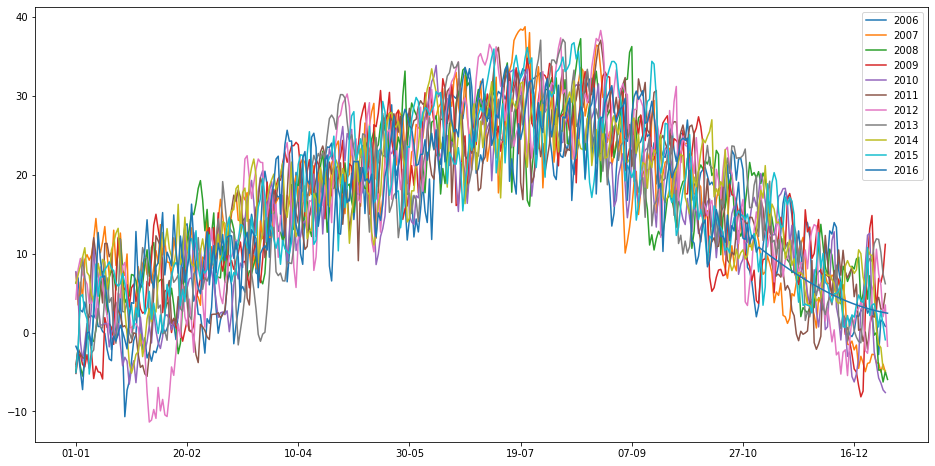

In [117]:
t = data['Temperature (C)']
for key, group in t.groupby(t.index.year):
    g = group[group.index.hour.isin(range(12,17))] # только дневное время
    g = g.groupby([g.index.date]).mean()
    g.index = pd.to_datetime(g.index).strftime('%d-%m')
    g.plot(figsize = (16,8), label = key)
plt.legend()